In [1]:
# Import necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt

# Set image size
IMAGE_SIZE = [224, 224]  # DenseNet prefers 224x224 images

# Define dataset paths
train_path = '../Datasets/New Plant Diseases Dataset(Augmented)/train'
valid_path = '../Datasets/New Plant Diseases Dataset(Augmented)/valid'

# Load DenseNet121 pre-trained model (without the top layers)
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in densenet.layers:
    layer.trainable = False

# Get the number of output classes
folders = glob(train_path + '/*')

# Add custom layers
x = Flatten()(densenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=densenet.input, outputs=prediction)

# Display model summary
model.summary()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 30ee3e1110167f948a6b9946edeeb738 so we will re-download the data.
29084464/29084464 [==============================] - 475s 16us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)        

In [2]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data preprocessing for validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Epoch 1/10
574/574 [==============================] - 32271s 56s/step - loss: 1.6246 - accuracy: 0.7773 - val_loss: 1.6858 - val_accuracy: 0.8052
Epoch 2/10
574/574 [==============================] - 1158s 2s/step - loss: 1.1388 - accuracy: 0.8712 - val_loss: 1.4815 - val_accuracy: 0.8665
Epoch 3/10
574/574 [==============================] - 1271s 2s/step - loss: 0.9736 - accuracy: 0.9005 - val_loss: 0.8199 - val_accuracy: 0.9180
Epoch 4/10
574/574 [==============================] - 1289s 2s/step - loss: 0.9277 - accuracy: 0.9101 - val_loss: 1.1760 - val_accuracy: 0.9005
Epoch 5/10
574/574 [==============================] - 1156s 2s/step - loss: 0.8477 - accuracy: 0.9237 - val_loss: 1.8463 - val_accuracy: 0.8838
Epoch 6/10
574/574 [==============================] - 1278s 2s/step - loss: 0.8583 - accuracy: 0.9288 - val_loss: 1.7635 - val_accuracy: 0.8912
Epoch 7/10
574/574 [===========================

In [3]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

144/144 [==============================] - 307s 2s/step - loss: 1.9058 - accuracy: 0.9008
Validation Loss: 1.9058341979980469
Validation Accuracy: 0.9007633328437805


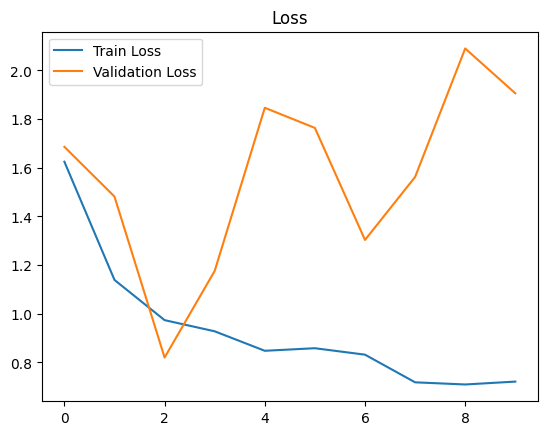

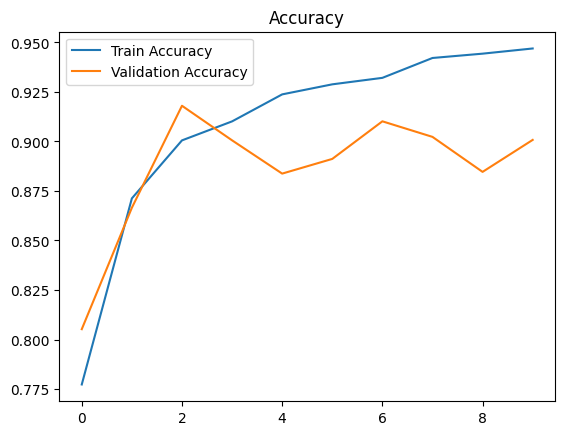

In [4]:
# Plot loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Plot accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [5]:

# Save the model
model.save('../Models/DenseNet_model.h5')